In [ ]:
#Ejercicio 51 Traslacion

In [3]:
import cv2
import numpy as np
#--leer la imagen 
img = cv2.imread('images/ave.jpg',0)
#--obtenemos ancho y alto de la imagen
rows,cols = img.shape
#--desplazamiento
tx = 210
ty = 150
#--crea la matriz de traslación
M = np.float32([[1,0,tx],
                [0,1,ty]])
#--realiza la traslación
dst = cv2.warpAffine(img,M,(cols,rows))
#--muestra la imagen
cv2.imshow('ave', img)
cv2.imshow('traslación',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#Ejercicio 52 Rotacion

In [1]:
import cv2
import numpy as np
#--leer imagen
image = cv2.imread('images/ave.jpg')
#--obtener dimensiones de la imagen
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas
#--define la matriz de rotación
M = cv2.getRotationMatrix2D((ancho//3,alto//3),45,1)
#--ejecuta la rotación
imageOut = cv2.warpAffine(image,M,(ancho,alto))
#--muestra las imágenes
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
#Ejercicio 53 Escalado

In [13]:
import cv2
#--leer imagen
image = cv2.imread('images/ave.jpg')
#--obtener dimensiones
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas
print(alto,ancho)
#--escalando la imagen 
imageOut = cv2.resize(image,(600,300), interpolation=cv2.INTER_CUBIC)
#--mostrar las imágenes
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

426 640


In [14]:
#Ejercicio 54 Recorte

In [18]:
import cv2
#--leer la imagen
image = cv2.imread('images/ave.jpg')
#--recortar una imagen
imageOut = image[60:220,280:480]
#--mostra las imágenes
cv2.imshow('Imagen de entrada',image)
cv2.imshow('Imagen de salida',imageOut)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
#Ejercicio 55 Inclinacion

In [2]:
import cv2
import numpy as np
import math
#--leer la imagen
src = cv2.imread('images/lena.jpg')
#--obtener dimensiones
rows, cols = src.shape[:2]
print(rows, cols)
#--obtener las tangentes en ambos ejes
ix = math.tan(20 * math.pi / 180)
iy = math.tan(15 * math.pi / 180)
#--obtener la matriz de transformación
M = np.float32([[1, ix, 0], [iy, 1, 0]])
#--ejecutar la trasnformación
dst = cv2.warpAffine(src, M, (cols + 256, rows + 256))
#--mostrar las imágenes
cv2.imshow('lena.jpg', src)
cv2.imshow('Inclinar', dst)
cv2.waitKey()
cv2.destroyAllWindows()

512 512


In [ ]:
#Ejercicio 56 Transformacion a fin

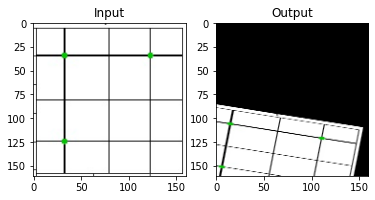

In [27]:
import numpy as np
import matplotlib.pyplot as plt #carga la librería para graficar
import cv2
#--leer la imagen
img = cv2.imread('images/cuadricula.jpg')
#--obtener dimensiones
rows,cols,ch = img.shape

#--definir 3 puntos de la imagen original
pts1 = np.float32([[100,400],[400,100],[100,100]])
#--definir 3 puntos en la imagen de salida
pts2 = np.float32([[50,300],[400,200],[80,150]])

#--obtener la matriz de transformación 
M = cv2.getAffineTransform(pts1,pts2)
#--aplicar la transofrmación
dst = cv2.warpAffine(img,M,(cols,rows))
#--mostrar las imágenes
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
#Ejercicio 57 Transformacion de perspectiva

In [31]:
import math
import numpy as np
import cv2
#--leer la imagen
src = cv2.imread('images/left.jpg')
#--obtener dimensiones
rows, cols = src.shape[:2]

#--definir los 4 puntos en la imagen original
pts1 = np.float32([[113, 137], [256, 136], [270, 337], [140, 377]])
#--definir los 4 puntos en la imagen de salida
pts2 = np.float32([[0, 0], [165, 0], [165, 223], [0, 223]])

#--obtener la matriz de transformación
M = cv2.getPerspectiveTransform(pts1, pts2)

#--ejecutar la transformación
dst = cv2.warpPerspective(src, M, (165, 223))
#--mostrar las imágenes
cv2.imshow('Imagen con perspectiva', src)
cv2.imshow('Transform.', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
#Ejercicio 58 Transformacion de perspectiva con puntos del mouse

In [4]:
import cv2
import numpy as np

def clics(event,x,y,flags,param):
	global puntos
	if event == cv2.EVENT_LBUTTONDOWN:
		cv2.circle(imagen,(x,y),5,(0,255,0),2)
		puntos.append([x,y])

def uniendo4puntos(puntos):
	cv2.line(imagen,tuple(puntos[0]),tuple(puntos[1]),(255,0,0),1)
	cv2.line(imagen,tuple(puntos[0]),tuple(puntos[2]),(255,0,0),1)
	cv2.line(imagen,tuple(puntos[2]),tuple(puntos[3]),(255,0,0),1)
	cv2.line(imagen,tuple(puntos[1]),tuple(puntos[3]),(255,0,0),1)

puntos = []
imagen = cv2.imread('images/licenseplate1.jpg')
aux = imagen.copy()
cv2.namedWindow('Imagen')
cv2.setMouseCallback('Imagen',clics)

while True:

	if len(puntos) == 4:
		uniendo4puntos(puntos)
		pts1 = np.float32([puntos])
		pts2 = np.float32([[0,0], [480,0], [0,300], [480,300]])

		M = cv2.getPerspectiveTransform(pts1,pts2)
		dst = cv2.warpPerspective(imagen, M, (480,300))

		cv2.imshow('dst', dst)
	cv2.imshow('Imagen',imagen)
	
	k = cv2.waitKey(1) & 0xFF
	if k == ord('n'):
		imagen = aux.copy()
		puntos = []
		
	elif k == 27:
		break
        
cv2.destroyAllWindows()
puntos

[[26, 65], [255, 6], [25, 141], [250, 65]]

In [19]:
#Tarea
'''
Investigar la librería imutils para realizar transformaciones geométricas ilustrando con
ejemplos la utilización de esta librería.
'''